to create a line from parameters `pp.create_line_from_parameters` we must first assign a `max_i_ka` per LineCode.

Here is the Standard Line Parameters for PandaPower:

In [9]:
import os
import pandas as pd
import numpy as np

main_dir = os.path.abspath(os.path.join(os.path.abspath(""), ".."))
data_dir = '../Modified_116_LV_CSV'

In [10]:
lineCodes_df = pd.read_csv(os.path.join(data_dir, "LineCodes.csv"), skiprows=1, sep=';')

StdLineCodes_df = pd.read_csv(os.path.join(data_dir, 'StandardLineCodes.csv'), sep=';')
# print(StdLineCodes_df.head())
StdLineCodes_df['max_i_ka'].describe()

count    51.000000
mean      0.432314
std       0.269581
min       0.105000
25%       0.250500
50%       0.350000
75%       0.498000
max       1.150000
Name: max_i_ka, dtype: float64

In [11]:
from sklearn.preprocessing import StandardScaler

cs_StdLineCodes = StdLineCodes_df.loc[StdLineCodes_df['type'] == 'cs'].copy()

X = cs_StdLineCodes[['r_ohm_per_km', 'x_ohm_per_km', 'c_nf_per_km']]
Y = cs_StdLineCodes['max_i_ka']

x_pred = lineCodes_df[['Name', 'R1', 'X1', 'C1']].set_index('Name')
x_pred.columns = X.columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Y_scaled = scaler.fit_transform(Y.values.reshape(-1, 1))
x_pred_scaled = scaler.fit_transform(x_pred)

In [12]:
cs_StdLineCodes['max_i_ka'].describe()

count    19.000000
mean      0.330684
std       0.112827
min       0.142000
25%       0.250500
50%       0.315000
75%       0.391000
max       0.588000
Name: max_i_ka, dtype: float64

In [13]:
X.corr()

,r_ohm_per_km,x_ohm_per_km,c_nf_per_km
r_ohm_per_km,1.000000,-0.365341,0.000865
x_ohm_per_km,-0.365341,1.000000,-0.587702
c_nf_per_km,0.000865,-0.587702,1.000000


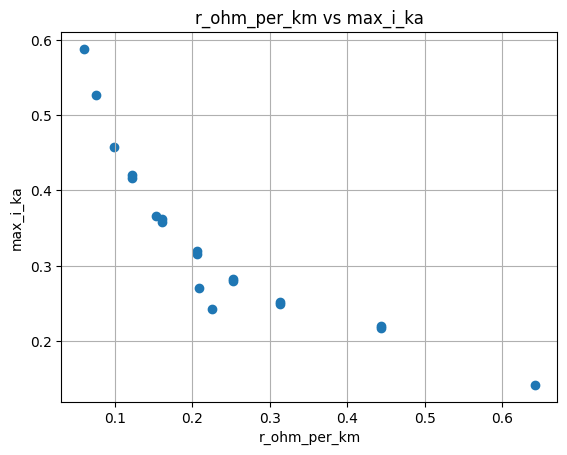

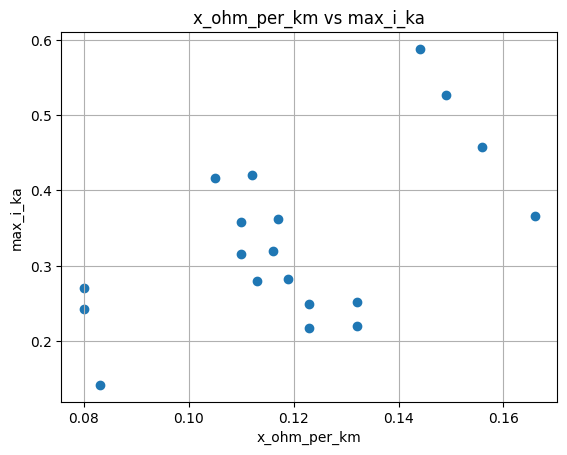

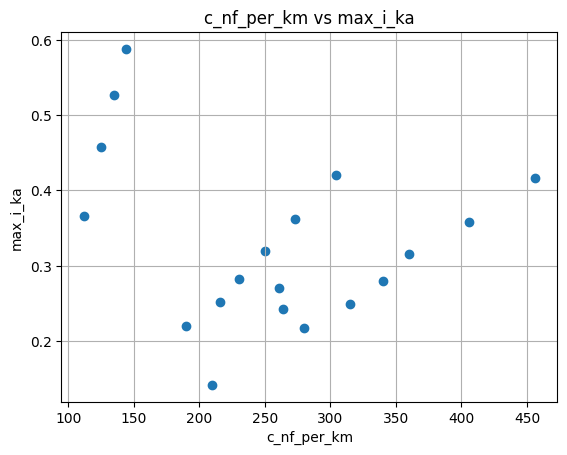

In [14]:
import matplotlib.pyplot as plt

for col in X.columns:
    plt.figure()
    plt.scatter(X[col], Y)
    plt.xlabel(col)
    plt.ylabel('max_i_ka')
    plt.title(f'{col} vs max_i_ka')
    plt.grid(True)
    plt.show()

In [15]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler

# Optional: Scale Y
# scaler_Y = StandardScaler()
# Y_scaled = scaler_Y.fit_transform(Y.values.reshape(-1, 1)).flatten()

# Use LOOCV to estimate error
loo = LeaveOneOut()

rig_model = Ridge(alpha=1.0)
rig_scores = cross_val_score(rig_model, X_scaled, Y, cv=loo, scoring='neg_mean_squared_error')
rmse = np.sqrt(-rig_scores.mean())
print(f"Estimated RMSE via Ridge LOOCV: {rmse:.4f}")

lr_model = LinearRegression()
lr_scores = cross_val_score(lr_model, X_scaled, Y, cv=loo, scoring='neg_mean_squared_error')
rmse = np.sqrt(-rig_scores.mean())
print(f"Estimated RMSE via LR LOOCV: {rmse:.4f}")


# Train on all data and predict
rig_model.fit(X_scaled, Y)
Y_pred_rig = rig_model.predict(x_pred_scaled)
print(f"\nRidge Predicted Y: {Y_pred_rig}")

lr_model.fit(X_scaled, Y)
Y_pred_lr = lr_model.predict(x_pred_scaled)
print(f"\nLR Predicted Y: {Y_pred_lr}")

Estimated RMSE via Ridge LOOCV: 0.0697
Estimated RMSE via LR LOOCV: 0.0697

Ridge Predicted Y: [0.21769692 0.24762555 0.3158397  0.35050468 0.38466505 0.40724017
 0.34425949 0.37764212]

LR Predicted Y: [0.20892717 0.23965453 0.31058943 0.35267519 0.38946806 0.41510845
 0.34733374 0.38171712]


In [16]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_scaled, Y)

y_pred_knn = knn.predict(x_pred_scaled)
print(f"\nKNN Predicted Y: {y_pred_knn}")


KNN Predicted Y: [0.22966667 0.22966667 0.24033333 0.32133333 0.36733333 0.311
 0.36733333 0.36733333]
